In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

import sys
sys.path.insert(1, r"C:\Users\GHarrison\OneDrive - Lincoln College\Python Projects\Data Science\Utilities")
from classification_tools import plot_confusion_matrix
from misc_tools import percentage_bar_chart

https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/

In [2]:
df_loans = pd.read_excel("Data/CustomerLoans v2.xlsx")
df_loans.head()

CustomerNumber CustomerForename CustomerSurname CustomerGender  \
0           29061           Marian        Williams              F   
1           81602             Eric       Blackburn              M   
2           24053          Gillian          Curtis              F   
3           91503         Beverley         Jenkins              F   
4           95173         Ashleigh           Jones              F   

  CustomerAccessedAdvice CustomerPostcode  CustomerAgeAtStart  \
0                      N          CF2 1YJ                  52   
1                      N          G93 9NN                  31   
2                      N           G1 4PP                  36   
3                      N          B0H 5RR                  51   
4                      N          B63 5TW                  37   

            CustomerJobTitle CustomerDepartment  CustomerDeprivationDecile  \
0  Higher Education Lecturer    Human Resources                        8.0   
1            Engineer (Site)            Finance                        6.0   
2            Warden / Ranger    Human Resources                        2.0   
3        Dispensing Optician    Human Resources                        2.0   
4  Higher Education Lecturer    Human Resources                       10.0   

   ...                EmployerName             EmployerBusinessActivity  \
0  ...  Wilkinson, Evans and Smith                           Healthcare   
1  ...                Evans-Taylor             Electrical Installations   
2  ...                Williams LLC  Business, Consulting and Management   
3  ...  Wilkinson, Evans and Smith                           Healthcare   
4  ...                 Lewis Group               Teaching and Education   

   EmployerNumberOfEmployees  LoanApplicationMethod  LoanType LoanStatus  \
0                       8000                 Online    Bronze     Repaid   
1                         18              In Person  Platinum  Defaulted   
2                       1800                 Online  Platinum     Repaid   
3                       8000                 Online    Silver  Defaulted   
4                        738                 Online    Bronze     Repaid   

   LoanStartMonth LoanStartYear LoanExpectedEndYear LoanActualEndYear  
0              12          2016                2018            2018.0  
1               9          2017                2021            2018.0  
2               5          2019                2020            2020.0  
3               1          2017                2018            2017.0  
4               9          2016                2017            2017.0  

[5 rows x 24 columns]

In [3]:
df_loans["LoanStatus"].value_counts()

Repaid       2727
Defaulted    1452
Live         1107
Name: LoanStatus, dtype: int64

In [4]:
df_loans.drop(["CustomerNumber", "CustomerForename", "CustomerSurname", "CustomerPostcode"], axis=1, inplace=True)
df_loans = df_loans.convert_dtypes()
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5286 entries, 0 to 5285
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   CustomerGender                    5286 non-null   string
 1   CustomerAccessedAdvice            5286 non-null   string
 2   CustomerAgeAtStart                5286 non-null   Int64 
 3   CustomerJobTitle                  5286 non-null   string
 4   CustomerDepartment                5286 non-null   string
 5   CustomerDeprivationDecile         5260 non-null   Int64 
 6   CustomerIncomeDecile              5260 non-null   Int64 
 7   CustomerEmploymentDecile          5260 non-null   Int64 
 8   CustomerEducationandSkillsDecile  5260 non-null   Int64 
 9   CustomerCrimeDecile               5260 non-null   Int64 
 10  EmployerName                      5286 non-null   string
 11  EmployerBusinessActivity          5286 non-null   string
 12  EmployerNumberOfEmpl

In [5]:
completed_filter = df_loans["LoanStatus"].isin(["Repaid", "Defaulted"])
df_completed = df_loans[completed_filter]
df_live = df_loans[~completed_filter]

df_completed = df_completed.dropna()

In [6]:
df_completed["LoanStatus"].value_counts(normalize=True)

Repaid       0.652069
Defaulted    0.347931
Name: LoanStatus, dtype: Float64

In [7]:
X = df_completed.drop(["LoanStatus"], axis=1)
y = df_completed["LoanStatus"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3117 entries, 3029 to 962
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   CustomerGender                    3117 non-null   string
 1   CustomerAccessedAdvice            3117 non-null   string
 2   CustomerAgeAtStart                3117 non-null   Int64 
 3   CustomerJobTitle                  3117 non-null   string
 4   CustomerDepartment                3117 non-null   string
 5   CustomerDeprivationDecile         3117 non-null   Int64 
 6   CustomerIncomeDecile              3117 non-null   Int64 
 7   CustomerEmploymentDecile          3117 non-null   Int64 
 8   CustomerEducationandSkillsDecile  3117 non-null   Int64 
 9   CustomerCrimeDecile               3117 non-null   Int64 
 10  EmployerName                      3117 non-null   string
 11  EmployerBusinessActivity          3117 non-null   string
 12  EmployerNumberOfEm

In [9]:
model = CatBoostClassifier(random_state=42)

In [10]:
categorical_features_indices = np.where(X_train.dtypes == "string")[0]
model.fit(X_train.to_numpy(), y_train.to_numpy(), cat_features=categorical_features_indices, eval_set=(X_test.to_numpy(), y_test.to_numpy()), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.041963
0:	learn: 0.6783899	test: 0.6798932	best: 0.6798932 (0)	total: 164ms	remaining: 2m 43s
1:	learn: 0.6674061	test: 0.6699256	best: 0.6699256 (1)	total: 188ms	remaining: 1m 34s
2:	learn: 0.6574675	test: 0.6611669	best: 0.6611669 (2)	total: 214ms	remaining: 1m 11s
3:	learn: 0.6471842	test: 0.6516790	best: 0.6516790 (3)	total: 240ms	remaining: 59.8s
4:	learn: 0.6397330	test: 0.6451954	best: 0.6451954 (4)	total: 263ms	remaining: 52.4s
5:	learn: 0.6309201	test: 0.6378552	best: 0.6378552 (5)	total: 287ms	remaining: 47.5s
6:	learn: 0.6224114	test: 0.6295443	best: 0.6295443 (6)	total: 312ms	remaining: 44.3s
7:	learn: 0.6167629	test: 0.6247243	best: 0.6247243 (7)	total: 338ms	remaining: 41.9s
8:	learn: 0.6075685	test: 0.6165815	best: 0.6165815 (8)	total: 362ms	remaining: 39.9s
9:	learn: 0.5983938	test: 0.6079550	best: 0.6079550 (9)	total: 390ms	remaining: 38.6s
10:	learn: 0.5908820	test: 0.6014018	best: 0.6014018 (10)	total: 416ms	remaining: 37.4s
11:	learn: 0.585533

100:	learn: 0.3897734	test: 0.4315620	best: 0.4315620 (100)	total: 2.74s	remaining: 24.4s
101:	learn: 0.3890092	test: 0.4311044	best: 0.4311044 (101)	total: 2.77s	remaining: 24.4s
102:	learn: 0.3884343	test: 0.4309262	best: 0.4309262 (102)	total: 2.79s	remaining: 24.3s
103:	learn: 0.3880061	test: 0.4307993	best: 0.4307993 (103)	total: 2.82s	remaining: 24.3s
104:	learn: 0.3875728	test: 0.4308066	best: 0.4307993 (103)	total: 2.85s	remaining: 24.3s
105:	learn: 0.3868599	test: 0.4303338	best: 0.4303338 (105)	total: 2.87s	remaining: 24.2s
106:	learn: 0.3867812	test: 0.4303296	best: 0.4303296 (106)	total: 2.89s	remaining: 24.1s
107:	learn: 0.3860265	test: 0.4300859	best: 0.4300859 (107)	total: 2.92s	remaining: 24.1s
108:	learn: 0.3843965	test: 0.4288477	best: 0.4288477 (108)	total: 2.94s	remaining: 24.1s
109:	learn: 0.3839133	test: 0.4289888	best: 0.4288477 (108)	total: 2.97s	remaining: 24s
110:	learn: 0.3831164	test: 0.4283017	best: 0.4283017 (110)	total: 2.99s	remaining: 24s
111:	learn: 0.

192:	learn: 0.3360337	test: 0.4059569	best: 0.4054889 (191)	total: 5.1s	remaining: 21.3s
193:	learn: 0.3355702	test: 0.4057552	best: 0.4054889 (191)	total: 5.13s	remaining: 21.3s
194:	learn: 0.3349585	test: 0.4054803	best: 0.4054803 (194)	total: 5.15s	remaining: 21.3s
195:	learn: 0.3347670	test: 0.4054229	best: 0.4054229 (195)	total: 5.18s	remaining: 21.3s
196:	learn: 0.3342660	test: 0.4053596	best: 0.4053596 (196)	total: 5.21s	remaining: 21.2s
197:	learn: 0.3340183	test: 0.4052974	best: 0.4052974 (197)	total: 5.23s	remaining: 21.2s
198:	learn: 0.3337941	test: 0.4050887	best: 0.4050887 (198)	total: 5.26s	remaining: 21.2s
199:	learn: 0.3332636	test: 0.4049923	best: 0.4049923 (199)	total: 5.28s	remaining: 21.1s
200:	learn: 0.3327353	test: 0.4046299	best: 0.4046299 (200)	total: 5.31s	remaining: 21.1s
201:	learn: 0.3321651	test: 0.4040055	best: 0.4040055 (201)	total: 5.33s	remaining: 21.1s
202:	learn: 0.3313939	test: 0.4035903	best: 0.4035903 (202)	total: 5.36s	remaining: 21s
203:	learn: 0

286:	learn: 0.2936529	test: 0.3935221	best: 0.3934553 (280)	total: 7.59s	remaining: 18.9s
287:	learn: 0.2932904	test: 0.3936546	best: 0.3934553 (280)	total: 7.62s	remaining: 18.8s
288:	learn: 0.2928424	test: 0.3932500	best: 0.3932500 (288)	total: 7.64s	remaining: 18.8s
289:	learn: 0.2923686	test: 0.3931139	best: 0.3931139 (289)	total: 7.67s	remaining: 18.8s
290:	learn: 0.2921130	test: 0.3930603	best: 0.3930603 (290)	total: 7.69s	remaining: 18.7s
291:	learn: 0.2917833	test: 0.3930824	best: 0.3930603 (290)	total: 7.71s	remaining: 18.7s
292:	learn: 0.2914985	test: 0.3930926	best: 0.3930603 (290)	total: 7.74s	remaining: 18.7s
293:	learn: 0.2913030	test: 0.3931242	best: 0.3930603 (290)	total: 7.77s	remaining: 18.6s
294:	learn: 0.2909825	test: 0.3931961	best: 0.3930603 (290)	total: 7.79s	remaining: 18.6s
295:	learn: 0.2908152	test: 0.3932772	best: 0.3930603 (290)	total: 7.82s	remaining: 18.6s
296:	learn: 0.2904784	test: 0.3929629	best: 0.3929629 (296)	total: 7.85s	remaining: 18.6s
297:	learn

384:	learn: 0.2640039	test: 0.3896005	best: 0.3895595 (343)	total: 10.2s	remaining: 16.3s
385:	learn: 0.2637974	test: 0.3896187	best: 0.3895595 (343)	total: 10.2s	remaining: 16.2s
386:	learn: 0.2635623	test: 0.3897421	best: 0.3895595 (343)	total: 10.2s	remaining: 16.2s
387:	learn: 0.2633942	test: 0.3897843	best: 0.3895595 (343)	total: 10.3s	remaining: 16.2s
388:	learn: 0.2630534	test: 0.3898199	best: 0.3895595 (343)	total: 10.3s	remaining: 16.2s
389:	learn: 0.2628005	test: 0.3898995	best: 0.3895595 (343)	total: 10.3s	remaining: 16.1s
390:	learn: 0.2626335	test: 0.3896719	best: 0.3895595 (343)	total: 10.3s	remaining: 16.1s
391:	learn: 0.2624152	test: 0.3895661	best: 0.3895595 (343)	total: 10.4s	remaining: 16.1s
392:	learn: 0.2623038	test: 0.3896552	best: 0.3895595 (343)	total: 10.4s	remaining: 16.1s
393:	learn: 0.2620208	test: 0.3898413	best: 0.3895595 (343)	total: 10.4s	remaining: 16s
394:	learn: 0.2618231	test: 0.3898089	best: 0.3895595 (343)	total: 10.5s	remaining: 16s
395:	learn: 0.

478:	learn: 0.2411096	test: 0.3876282	best: 0.3875228 (477)	total: 12.7s	remaining: 13.8s
479:	learn: 0.2409403	test: 0.3877275	best: 0.3875228 (477)	total: 12.7s	remaining: 13.8s
480:	learn: 0.2406123	test: 0.3878716	best: 0.3875228 (477)	total: 12.7s	remaining: 13.7s
481:	learn: 0.2405441	test: 0.3878201	best: 0.3875228 (477)	total: 12.8s	remaining: 13.7s
482:	learn: 0.2401338	test: 0.3877491	best: 0.3875228 (477)	total: 12.8s	remaining: 13.7s
483:	learn: 0.2398221	test: 0.3878827	best: 0.3875228 (477)	total: 12.8s	remaining: 13.7s
484:	learn: 0.2395385	test: 0.3879571	best: 0.3875228 (477)	total: 12.8s	remaining: 13.6s
485:	learn: 0.2393033	test: 0.3879398	best: 0.3875228 (477)	total: 12.9s	remaining: 13.6s
486:	learn: 0.2391436	test: 0.3880714	best: 0.3875228 (477)	total: 12.9s	remaining: 13.6s
487:	learn: 0.2390479	test: 0.3880258	best: 0.3875228 (477)	total: 12.9s	remaining: 13.6s
488:	learn: 0.2388563	test: 0.3881648	best: 0.3875228 (477)	total: 13s	remaining: 13.5s
489:	learn: 

571:	learn: 0.2221850	test: 0.3870642	best: 0.3868766 (569)	total: 15.2s	remaining: 11.4s
572:	learn: 0.2219723	test: 0.3872167	best: 0.3868766 (569)	total: 15.2s	remaining: 11.4s
573:	learn: 0.2218400	test: 0.3872675	best: 0.3868766 (569)	total: 15.3s	remaining: 11.3s
574:	learn: 0.2216786	test: 0.3872830	best: 0.3868766 (569)	total: 15.3s	remaining: 11.3s
575:	learn: 0.2215402	test: 0.3873345	best: 0.3868766 (569)	total: 15.3s	remaining: 11.3s
576:	learn: 0.2215348	test: 0.3873203	best: 0.3868766 (569)	total: 15.4s	remaining: 11.3s
577:	learn: 0.2213752	test: 0.3871424	best: 0.3868766 (569)	total: 15.4s	remaining: 11.2s
578:	learn: 0.2211123	test: 0.3872667	best: 0.3868766 (569)	total: 15.4s	remaining: 11.2s
579:	learn: 0.2208204	test: 0.3873364	best: 0.3868766 (569)	total: 15.4s	remaining: 11.2s
580:	learn: 0.2207004	test: 0.3873545	best: 0.3868766 (569)	total: 15.5s	remaining: 11.2s
581:	learn: 0.2204009	test: 0.3873095	best: 0.3868766 (569)	total: 15.5s	remaining: 11.1s
582:	learn

663:	learn: 0.2048619	test: 0.3852376	best: 0.3852376 (663)	total: 17.7s	remaining: 8.94s
664:	learn: 0.2045277	test: 0.3851432	best: 0.3851432 (664)	total: 17.7s	remaining: 8.91s
665:	learn: 0.2043739	test: 0.3852897	best: 0.3851432 (664)	total: 17.7s	remaining: 8.89s
666:	learn: 0.2043244	test: 0.3852881	best: 0.3851432 (664)	total: 17.7s	remaining: 8.86s
667:	learn: 0.2040579	test: 0.3854640	best: 0.3851432 (664)	total: 17.8s	remaining: 8.83s
668:	learn: 0.2038945	test: 0.3853097	best: 0.3851432 (664)	total: 17.8s	remaining: 8.8s
669:	learn: 0.2038729	test: 0.3852959	best: 0.3851432 (664)	total: 17.8s	remaining: 8.78s
670:	learn: 0.2037610	test: 0.3852364	best: 0.3851432 (664)	total: 17.8s	remaining: 8.75s
671:	learn: 0.2035687	test: 0.3852637	best: 0.3851432 (664)	total: 17.9s	remaining: 8.72s
672:	learn: 0.2034305	test: 0.3852115	best: 0.3851432 (664)	total: 17.9s	remaining: 8.7s
673:	learn: 0.2032463	test: 0.3852048	best: 0.3851432 (664)	total: 17.9s	remaining: 8.67s
674:	learn: 

755:	learn: 0.1890433	test: 0.3859842	best: 0.3848519 (725)	total: 20s	remaining: 6.46s
756:	learn: 0.1889279	test: 0.3859506	best: 0.3848519 (725)	total: 20s	remaining: 6.43s
757:	learn: 0.1887910	test: 0.3859847	best: 0.3848519 (725)	total: 20.1s	remaining: 6.41s
758:	learn: 0.1884787	test: 0.3860525	best: 0.3848519 (725)	total: 20.1s	remaining: 6.38s
759:	learn: 0.1882545	test: 0.3859661	best: 0.3848519 (725)	total: 20.1s	remaining: 6.35s
760:	learn: 0.1881542	test: 0.3858783	best: 0.3848519 (725)	total: 20.1s	remaining: 6.33s
761:	learn: 0.1880241	test: 0.3858987	best: 0.3848519 (725)	total: 20.2s	remaining: 6.3s
762:	learn: 0.1878388	test: 0.3858119	best: 0.3848519 (725)	total: 20.2s	remaining: 6.27s
763:	learn: 0.1877071	test: 0.3858282	best: 0.3848519 (725)	total: 20.2s	remaining: 6.25s
764:	learn: 0.1874728	test: 0.3857893	best: 0.3848519 (725)	total: 20.2s	remaining: 6.22s
765:	learn: 0.1871245	test: 0.3855744	best: 0.3848519 (725)	total: 20.3s	remaining: 6.19s
766:	learn: 0.1

848:	learn: 0.1736612	test: 0.3857516	best: 0.3848519 (725)	total: 22.6s	remaining: 4.01s
849:	learn: 0.1734685	test: 0.3859039	best: 0.3848519 (725)	total: 22.6s	remaining: 3.98s
850:	learn: 0.1733325	test: 0.3859440	best: 0.3848519 (725)	total: 22.6s	remaining: 3.96s
851:	learn: 0.1732829	test: 0.3859843	best: 0.3848519 (725)	total: 22.6s	remaining: 3.93s
852:	learn: 0.1732093	test: 0.3860563	best: 0.3848519 (725)	total: 22.7s	remaining: 3.91s
853:	learn: 0.1730281	test: 0.3860843	best: 0.3848519 (725)	total: 22.7s	remaining: 3.88s
854:	learn: 0.1727130	test: 0.3862879	best: 0.3848519 (725)	total: 22.7s	remaining: 3.85s
855:	learn: 0.1726762	test: 0.3863138	best: 0.3848519 (725)	total: 22.8s	remaining: 3.83s
856:	learn: 0.1725605	test: 0.3862134	best: 0.3848519 (725)	total: 22.8s	remaining: 3.8s
857:	learn: 0.1724459	test: 0.3862547	best: 0.3848519 (725)	total: 22.8s	remaining: 3.77s
858:	learn: 0.1723013	test: 0.3861551	best: 0.3848519 (725)	total: 22.8s	remaining: 3.75s
859:	learn:

946:	learn: 0.1603098	test: 0.3883666	best: 0.3848519 (725)	total: 25.3s	remaining: 1.42s
947:	learn: 0.1601769	test: 0.3883976	best: 0.3848519 (725)	total: 25.3s	remaining: 1.39s
948:	learn: 0.1600778	test: 0.3884697	best: 0.3848519 (725)	total: 25.3s	remaining: 1.36s
949:	learn: 0.1599949	test: 0.3883891	best: 0.3848519 (725)	total: 25.4s	remaining: 1.33s
950:	learn: 0.1597121	test: 0.3883146	best: 0.3848519 (725)	total: 25.4s	remaining: 1.31s
951:	learn: 0.1596501	test: 0.3884190	best: 0.3848519 (725)	total: 25.4s	remaining: 1.28s
952:	learn: 0.1595887	test: 0.3884555	best: 0.3848519 (725)	total: 25.4s	remaining: 1.25s
953:	learn: 0.1594846	test: 0.3884368	best: 0.3848519 (725)	total: 25.5s	remaining: 1.23s
954:	learn: 0.1594049	test: 0.3884605	best: 0.3848519 (725)	total: 25.5s	remaining: 1.2s
955:	learn: 0.1592788	test: 0.3883438	best: 0.3848519 (725)	total: 25.5s	remaining: 1.18s
956:	learn: 0.1590986	test: 0.3883632	best: 0.3848519 (725)	total: 25.6s	remaining: 1.15s
957:	learn:

In [11]:
y_test_pred = model.predict(X_test.to_numpy())
y_test_pred

array(['Defaulted', 'Repaid', 'Repaid', ..., 'Repaid', 'Repaid', 'Repaid'],
      dtype=object)

In [12]:
accuracy_score(y_test, y_test_pred)

0.8479307025986526

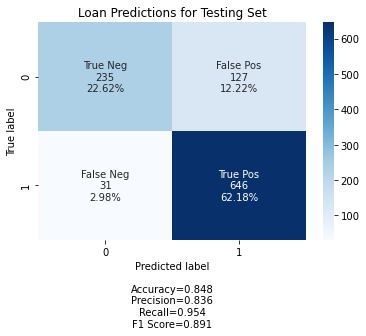

In [13]:
plot_confusion_matrix(y_test, y_test_pred, f"Loan Predictions for Testing Set", cmap="Blues")

In [14]:
y_train

3029       Repaid
4799       Repaid
4840    Defaulted
2664    Defaulted
181        Repaid
          ...    
4561       Repaid
529        Repaid
3793    Defaulted
4894    Defaulted
962     Defaulted
Name: LoanStatus, Length: 3117, dtype: string

In [15]:
percentage_bar_chart(y_train, title="Actual Loan Statuses for Training Data")

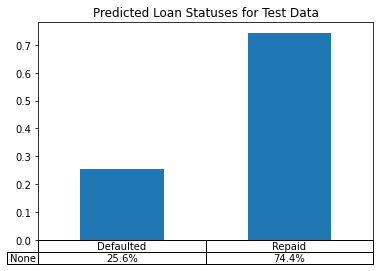

In [16]:
percentage_bar_chart(pd.Series(y_test_pred), title="Predicted Loan Statuses for Test Data")

In [17]:
df_live = df_live.drop("LoanStatus", axis=1)
df_live = df_live.dropna()

In [18]:
y_live_pred = model.predict(df_live.to_numpy())

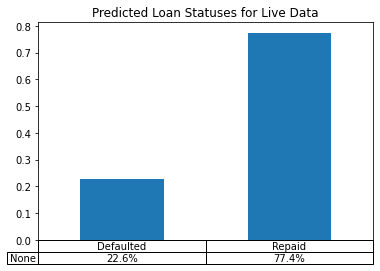

In [19]:
percentage_bar_chart(pd.Series(y_live_pred), title="Predicted Loan Statuses for Live Data")